# CreditMetrics Model for Air Canada

transition matrix taken from Table 21 in https://www.spglobal.com/ratings/en/research/articles/250327-default-transition-and-recovery-2024-annual-global-corporate-default-and-rating-transition-study-13452126?utm_source=chatgpt.com

NR (Not Rated) is treated to redistribute across all non-zero transitions

In [27]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from tqdm import trange

In [21]:
P = np.array([
    [87.28, 8.92, 0.51, 0.03, 0.1, 0.03, 0.05, 0, 3.08],
    [0.45, 87.74, 7.5, 0.44, 0.05, 0.06, 0.02, 0.02, 3.74],
    [0.02, 1.48, 89.42, 4.64, 0.23, 0.1, 0.01, 0.05, 4.04],
    [0, 0.07, 3.05, 87.33, 3.21, 0.4, 0.09, 0.14, 5.71],
    [0.01, 0.02, 0.1, 4.44, 78.89, 6.25, 0.5, 0.56, 9.23],
    [0, 0.02, 0.06, 0.14, 4.47, 75.18, 4.79, 2.93, 12.41],
    [0, 0, 0.07, 0.13, 0.4, 13.18, 45.07, 26.12, 15.03]
])

P = np.concatenate([P, np.zeros((1, 9))], axis=0)
P[7, 7] = 1
P = P[:, :-1] # remove NR
P = P / P.sum(axis=1)[:, np.newaxis]
P = P.T

In [47]:
pd.DataFrame(P * 100, columns=["AAA", "AA", "A", "BBB", "BB", "B", "C/CCC", "D"], index=["AAA", "AA", "A", "BBB", "BB", "B", "C/CCC", "D"])

,AAA,AA,A,BBB,BB,B,C/CCC,D
AAA,90.053652,0.467387,0.020844,0.000000,0.011017,0.000000,0.000000,0.0
AA,9.203467,91.130037,1.542470,0.074239,0.022034,0.022834,0.000000,0.0
A,0.526207,7.789780,93.194372,3.234701,0.110169,0.068501,0.082382,0.0
BBB,0.030953,0.457000,4.835852,92.618517,4.891484,0.159836,0.152995,0.0
BB,0.103178,0.051932,0.239708,3.404391,86.911975,5.103322,0.470754,0.0
B,0.030953,0.062318,0.104221,0.424223,6.885535,85.831716,15.511357,0.0
C/CCC,0.051589,0.020773,0.010422,0.095450,0.550843,5.468661,53.042250,0.0
D,0.000000,0.020773,0.052110,0.148478,0.616944,3.345131,30.740261,100.0


In [31]:
from scipy.linalg import fractional_matrix_power

dt = pd.read_csv("./risk-free-rate.csv")["dt"].to_numpy()

curr_rating_idx = 4 # BB rating

P_dft = np.zeros(len(dt))
for i in trange(len(dt)):
    P_dft[i] = fractional_matrix_power(P, dt[i])[-1, curr_rating_idx]

100%|██████████| 10000/10000 [00:32<00:00, 309.52it/s]


visualize

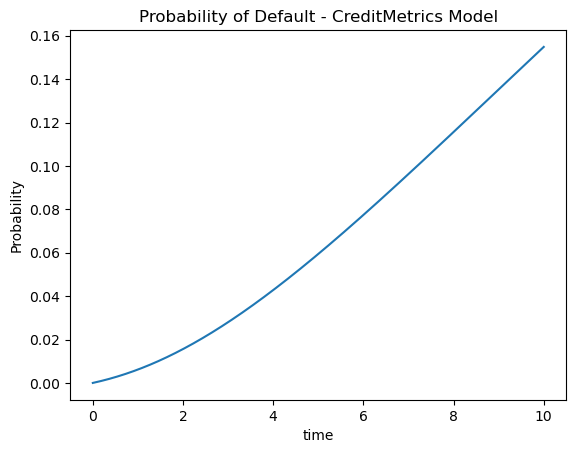

In [32]:
plt.figure()
plt.plot(dt, P_dft)
plt.xlabel("time")
plt.ylabel("Probability")
plt.title("Probability of Default - CreditMetrics Model")
plt.show()

compare two models

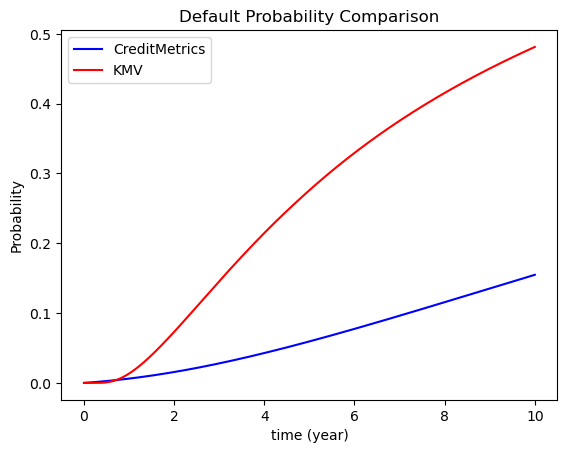

In [44]:
plt.figure()
cut_idx = 10000
plt.plot(dt[:cut_idx], P_dft[:cut_idx], 'b', label="CreditMetrics")
plt.plot(dt[:cut_idx], pd.read_csv("./KMV-default-prob.csv")["P_default"].to_numpy()[:cut_idx], 'r', label="KMV")
plt.xlabel("time (year)")
plt.ylabel("Probability")
plt.legend()
plt.title("Default Probability Comparison")
plt.show()